# Photo-Electric Effect


## Importing Packages


In [1]:
using Plots
using CSV, DataFrames
using Unitful
using LaTeXStrings
using LsqFit
using Statistics: mean
using PhysicalConstants.CODATA2018: c_0, e, h
pgfplotsx();

## Importing Data


In [2]:
planck_data = CSV.read("planck-data.tsv", delim='\t', DataFrame)

5×2 DataFrame
 Row │ wavelength  voltage 
     │ Int64       Float64 
─────┼─────────────────────
   1 │        635    -0.35
   2 │        570    -0.62
   3 │        540    -0.79
   4 │        500    -0.91
   5 │        460    -1.12

### Adding units to data


In [3]:
wavelen_planck_ul = planck_data[!, 1]
wavelen_planck = planck_data[!, 1] .* 1u"nm"
stopping_volt_planck = planck_data[!, 2] .* -1u"V"
stopping_volt_planck_ul = planck_data[!, 2] .* -1

5-element Vector{Float64}:
 0.35
 0.62
 0.79
 0.91
 1.12

In [4]:
freq_planck = round.(u"s^-1", c_0 ./ wavelen_planck ./ 1e14 .|> u"s^-1", digits=2)
freq_planck_ul = round.(u"s^-1", c_0 ./ wavelen_planck ./ 1e14 .|> u"s^-1", digits=2) .* 1u"s"

5-element Vector{Float64}:
 4.72
 5.26
 5.55
 6.0
 6.52

## Determination of Planck's Const


### fitting the curve


In [5]:
st_line(x, k) = @. k[1] * x + k[2];

In [6]:
fit_planck = curve_fit(st_line, freq_planck_ul, stopping_volt_planck_ul, [0.4, -1.5]);
planck_param = fit_planck.param
planck_eV, work_func = planck_param[1] * 1e-14u"V*s", planck_param[2] * 1u"V"
round(planck_param[2], digits=1)

-1.6

In [35]:
planck_se = standard_errors(fit_planck)
planck_se

2-element Vector{Float64}:
 0.029834726007504708
 0.16837938055288482

### Plotting the curve


In [8]:
freq_linscape = [i for i in 4.5:0.01:6.8];

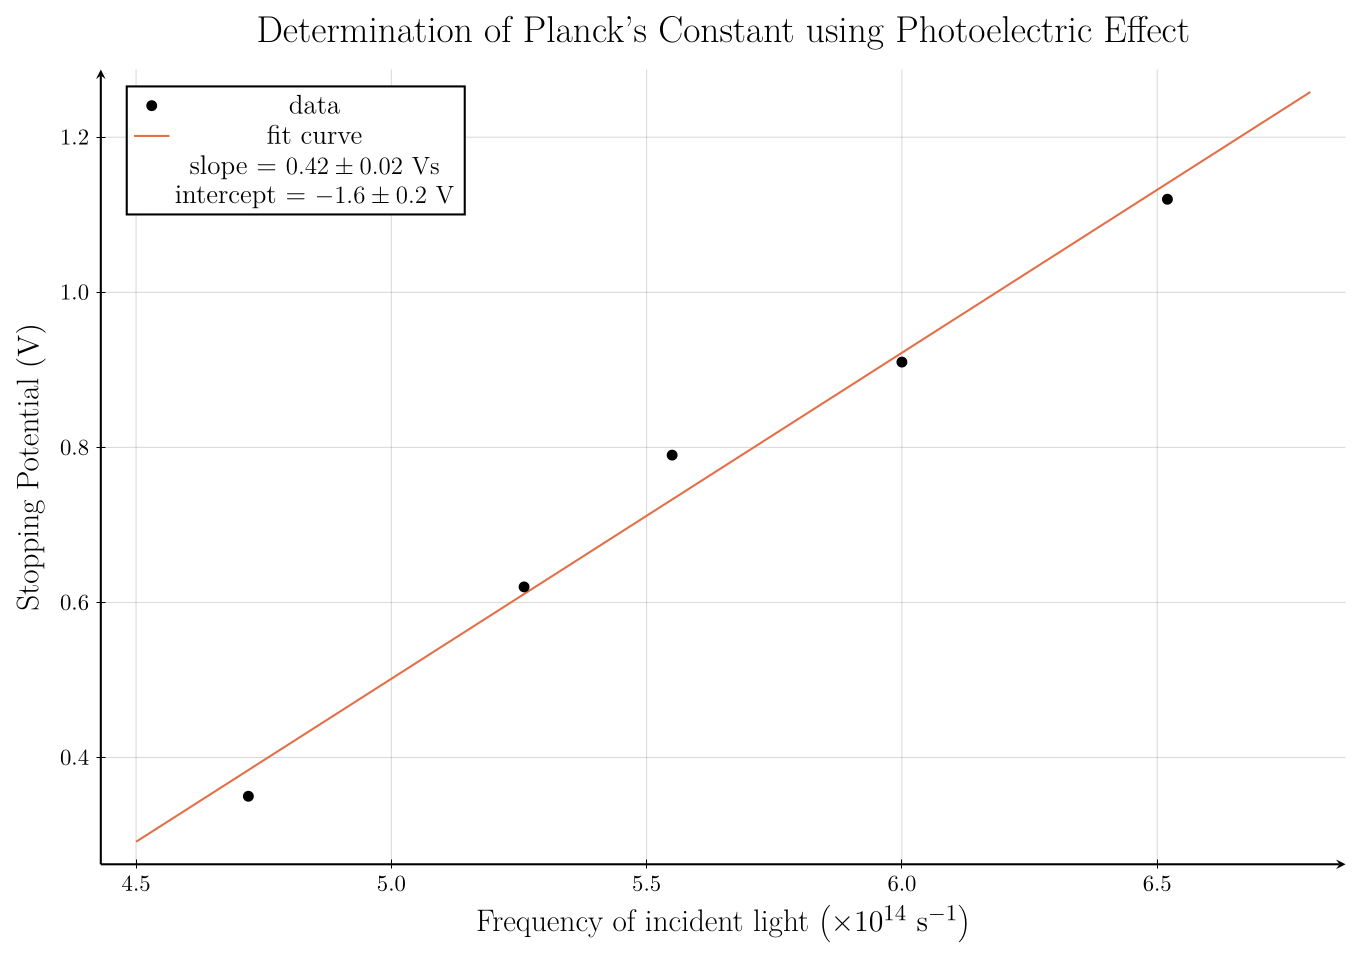

In [14]:
plot_height, plot_width = 11.69, 8.27 # Setting the szie of the plot

plt = scatter(freq_planck, stopping_volt_planck, label="data", ms=3, mc=:black) # plotting the main datastandard_error
plot!(freq_linscape, st_line(freq_linscape, planck_param), label="fit curve")

plot!([4.8], [0.38], color=:white, label=L"slope = $0.42 \pm 0.02~\mathrm{Vs}$")
plot!([4.8], [0.38], color=:white, label=L"intercept = $-1.6 \pm 0.2~\mathrm{V}$")

plot!(
    size=(900, 600),
    extra_kwargs=Dict(:plot => Dict("height" => "$(plot_height)in", "width" => "$(plot_width)in")),
    dpi=300,
    title="Determination of Planck's Constant using Photoelectric Effect",
    xlabel=L"Frequency of incident light $\left(\times 10^{14}~\mathrm{s^{-1}}\right)$",
    ylabel=L"Stopping Potential $\left(\mathrm{V}\right)$",
    legendfontsize=13,
    titlefontsize=18,
    tickfontsize=11,
    guidefontsize=15,
    ga=0.15,
    formatter=:scientific,
    legend=:topleft,
    # framestyle=:zerolines,
    draw_arrow=true,
) # some formatting about these graphs

Plots.pdf("planck.pdf")
plt

In [10]:
planck_const = planck_eV * e |> u"J*s"

6.736501207536659e-34 J s

## Verifaction of Inverse Square Law


### Importing Data


In [18]:
inv_data = CSV.read("inv_sq-data.tsv", delim='\t', DataFrame)

9×2 DataFrame
 Row │ r      current 
     │ Int64  Float64 
─────┼────────────────
   1 │    18     1.23
   2 │    20     0.96
   3 │    22     0.79
   4 │    24     0.67
   5 │    26     0.57
   6 │    28     0.5
   7 │    30     0.45
   8 │    32     0.41
   9 │    34     0.37

#### Adding the units


In [21]:
dist_ul = inv_data[!, 1]
dist = inv_data[!, 1] .* 1u"cm"
current_inv_ul = inv_data[!, 2]
current_inv = inv_data[!, 2] .* 1u"nA"

9-element Vector{Quantity{Float64, 𝐈, Unitful.FreeUnits{(nA,), 𝐈, nothing}}}:
 1.23 nA
 0.96 nA
 0.79 nA
 0.67 nA
 0.57 nA
  0.5 nA
 0.45 nA
 0.41 nA
 0.37 nA

In [26]:
inv_dist_ul = round.(1 ./ dist_ul .^ 2 .* 1e3, digits=2)
inv_dist = round.(u"cm^-2", 1 ./ dist .^ 2 .* 1e3, digits=2)

9-element Vector{Quantity{Float64, 𝐋^-2, Unitful.FreeUnits{(cm^-2,), 𝐋^-2, nothing}}}:
 3.09 cm^-2
  2.5 cm^-2
 2.07 cm^-2
 1.74 cm^-2
 1.48 cm^-2
 1.28 cm^-2
 1.11 cm^-2
 0.98 cm^-2
 0.87 cm^-2

### Fitting the data


In [49]:
fit_inv = curve_fit(st_line, inv_dist_ul, current_inv_ul, [0.4, -1.5]);
inv_sq_param = fit_inv.param
round(inv_sq_param[2], digits=2)

0.02

In [37]:
inv_se = standard_errors(fit_inv)
inv_se

2-element Vector{Float64}:
 0.009188879938487873
 0.016745401380299146

In [44]:
R_2 = 1 - sum((current_inv_ul - st_line(inv_dist_ul, inv_sq_param)) .^ 2) / sum((current_inv_ul .- mean(current_inv_ul)) .^ 2)

0.995958863039896

In [31]:
inv_dist_lin = [i for i in 0.8:0.01:3.1];

In [64]:
plt = scatter(inv_dist, current_inv, label="data", ms=3, mc=:black) # plotting the main datastandard_error
plot!(inv_dist_lin, st_line(inv_dist_lin, inv_sq_param), label="fit curve")

plot!([0.8], [0.5], color=:white, label=L"slope = $0.382 \pm 0.009~\mathrm{n A cm^{-2}}$")
plot!([0.8], [0.5], color=:white, label=L"intercept = $0.02 \pm 0.02~\mathrm{\mu A}$")
plot!([0.8], [0.5], color=:white, label=L"$R^2 = 0.995958863039896$")

plot!(
    size=(900, 600),
    extra_kwargs=Dict(:plot => Dict("height" => "$(plot_height)in", "width" => "$(plot_width)in")),
    dpi=300,
    title="Verification of Inverse Square Law",
    xlabel=L"Inverse of square of distance $\left(\times 10^{3}~\mathrm{cm^{-2}}\right)$",
    ylabel=L"Photocurrent $\left(\mathrm{\mu A}\right)$",
    legendfontsize=13,
    titlefontsize=18,
    tickfontsize=11,
    guidefontsize=15,
    ga=0.15,
    formatter=:scientific,
    legend=:topleft,
    # framestyle=:zerolines,
    draw_arrow=true,
) # some formatting about these graphs

Plots.pdf("inv_sqr.pdf")
plt

## Current Saturation


### Importing Data


In [3]:
sat_data = CSV.read("sat-data.tsv", delim='\t', DataFrame)

31×3 DataFrame
 Row │ voltage  current (d=20)  current (d-30) 
     │ Float64  Float64         Float64        
─────┼─────────────────────────────────────────
   1 │    -1.0          -0.002           0.0
   2 │    -0.9          -0.002           0.0
   3 │    -0.8          -0.002           0.0
   4 │    -0.7          -0.002           0.0
   5 │    -0.6          -0.002           0.0
   6 │    -0.5          -0.002           0.0
   7 │    -0.4          -0.001           0.0
   8 │    -0.3           0.0             0.0
  ⋮  │    ⋮           ⋮               ⋮
  25 │     2.8           4.55            2.18
  26 │     3.0           4.66            2.16
  27 │     3.2           4.7             2.31
  28 │     3.4           4.82            2.36
  29 │     3.6           4.92            2.47
  30 │     3.8           5.1             2.43
  31 │     4.0           5.22            2.48
                                16 rows omitted

#### Adding Units


In [4]:
sat_volt_ul = sat_data[!, 1]
sat_volt = sat_data[!, 1] .* 1u"V"
sat_current_20_ul = sat_data[!, 2]
sat_current_20 = sat_data[!, 2] .* 1u"μA"
sat_current_30_ul = sat_data[!, 3]
sat_current_30 = sat_data[!, 3] .* 1u"μA"

31-element Vector{Quantity{Float64, 𝐈, Unitful.FreeUnits{(μA,), 𝐈, nothing}}}:
   0.0 μA
   0.0 μA
   0.0 μA
   0.0 μA
   0.0 μA
   0.0 μA
   0.0 μA
   0.0 μA
 0.005 μA
 0.029 μA
        ⋮
  2.02 μA
  2.14 μA
  2.18 μA
  2.16 μA
  2.31 μA
  2.36 μA
  2.47 μA
  2.43 μA
  2.48 μA

### Plotting the curve


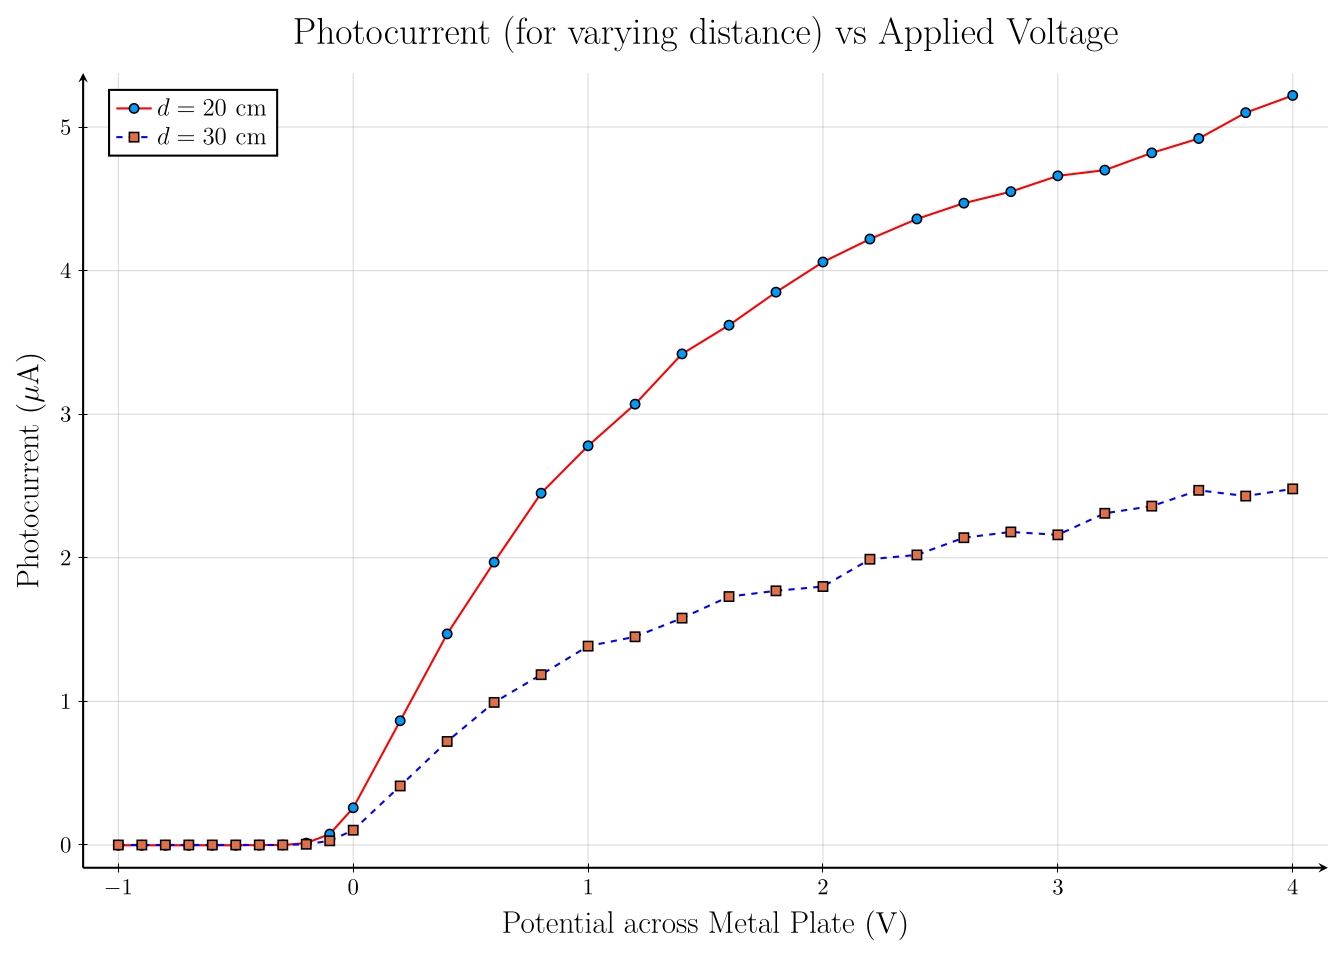

In [8]:
plot_height, plot_width = 11.69, 8.27 # Setting the szie of the plot

plt = plot(sat_volt, [sat_current_20 sat_current_30], label=[L"$d = 20~\mathrm{cm}$" L"$d = 30~\mathrm{cm}$"], marker=[:circle :rect], ms=3, lw=1, lc=[:red :blue], ls=[:solid :dash]) # plotting the main datastandard_error
# plot!(inv_dist_lin, st_line(inv_dist_lin, inv_sq_param), label="fit curve")

# plot!([0.8], [0.5], color=:white, label=L"slope = $0.382 \pm 0.009~\mathrm{n A cm^{-2}}$")
# plot!([0.8], [0.5], color=:white, label=L"intercept = $0.02 \pm 0.02~\mathrm{\mu A}$")
# plot!([0.8], [0.5], color=:white, label=L"$R^2 = 0.995958863039896$")

plot!(
    size=(900, 600),
    extra_kwargs=Dict(:plot => Dict("height" => "$(plot_height)in", "width" => "$(plot_width)in")),
    dpi=300,
    title="Photocurrent (for varying distance) vs Applied Voltage",
    xlabel=L"Potential across Metal Plate $\left(\mathrm{V}\right)$",
    ylabel=L"Photocurrent $\left(\mathrm{\mu A}\right)$",
    legendfontsize=13,
    titlefontsize=18,
    tickfontsize=11,
    guidefontsize=15,
    ga=0.15,
    formatter=:scientific,
    legend=:topleft,
    # framestyle=:zerolines,
    draw_arrow=true,
) # some formatting about these graphs

Plots.pdf("sat_current.pdf")
plt